# Importing data and basic EDA

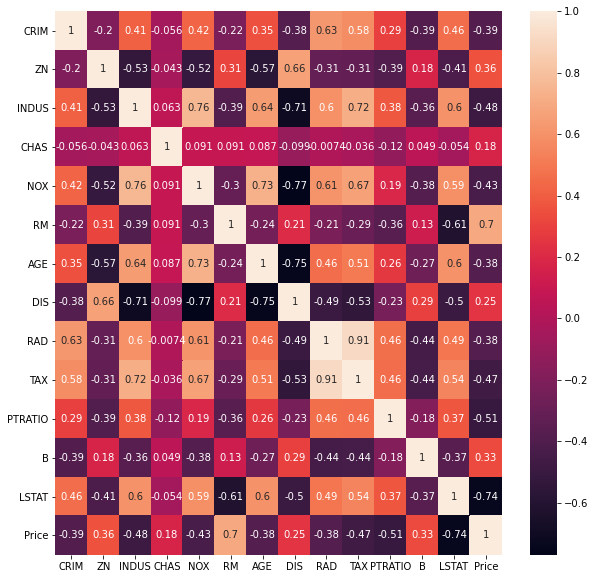

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

#data
boston = load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#target variable
boston_df['Price']=boston.target
#preview
boston_df.head()

#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(boston_df.corr(), annot = True)
plt.show()

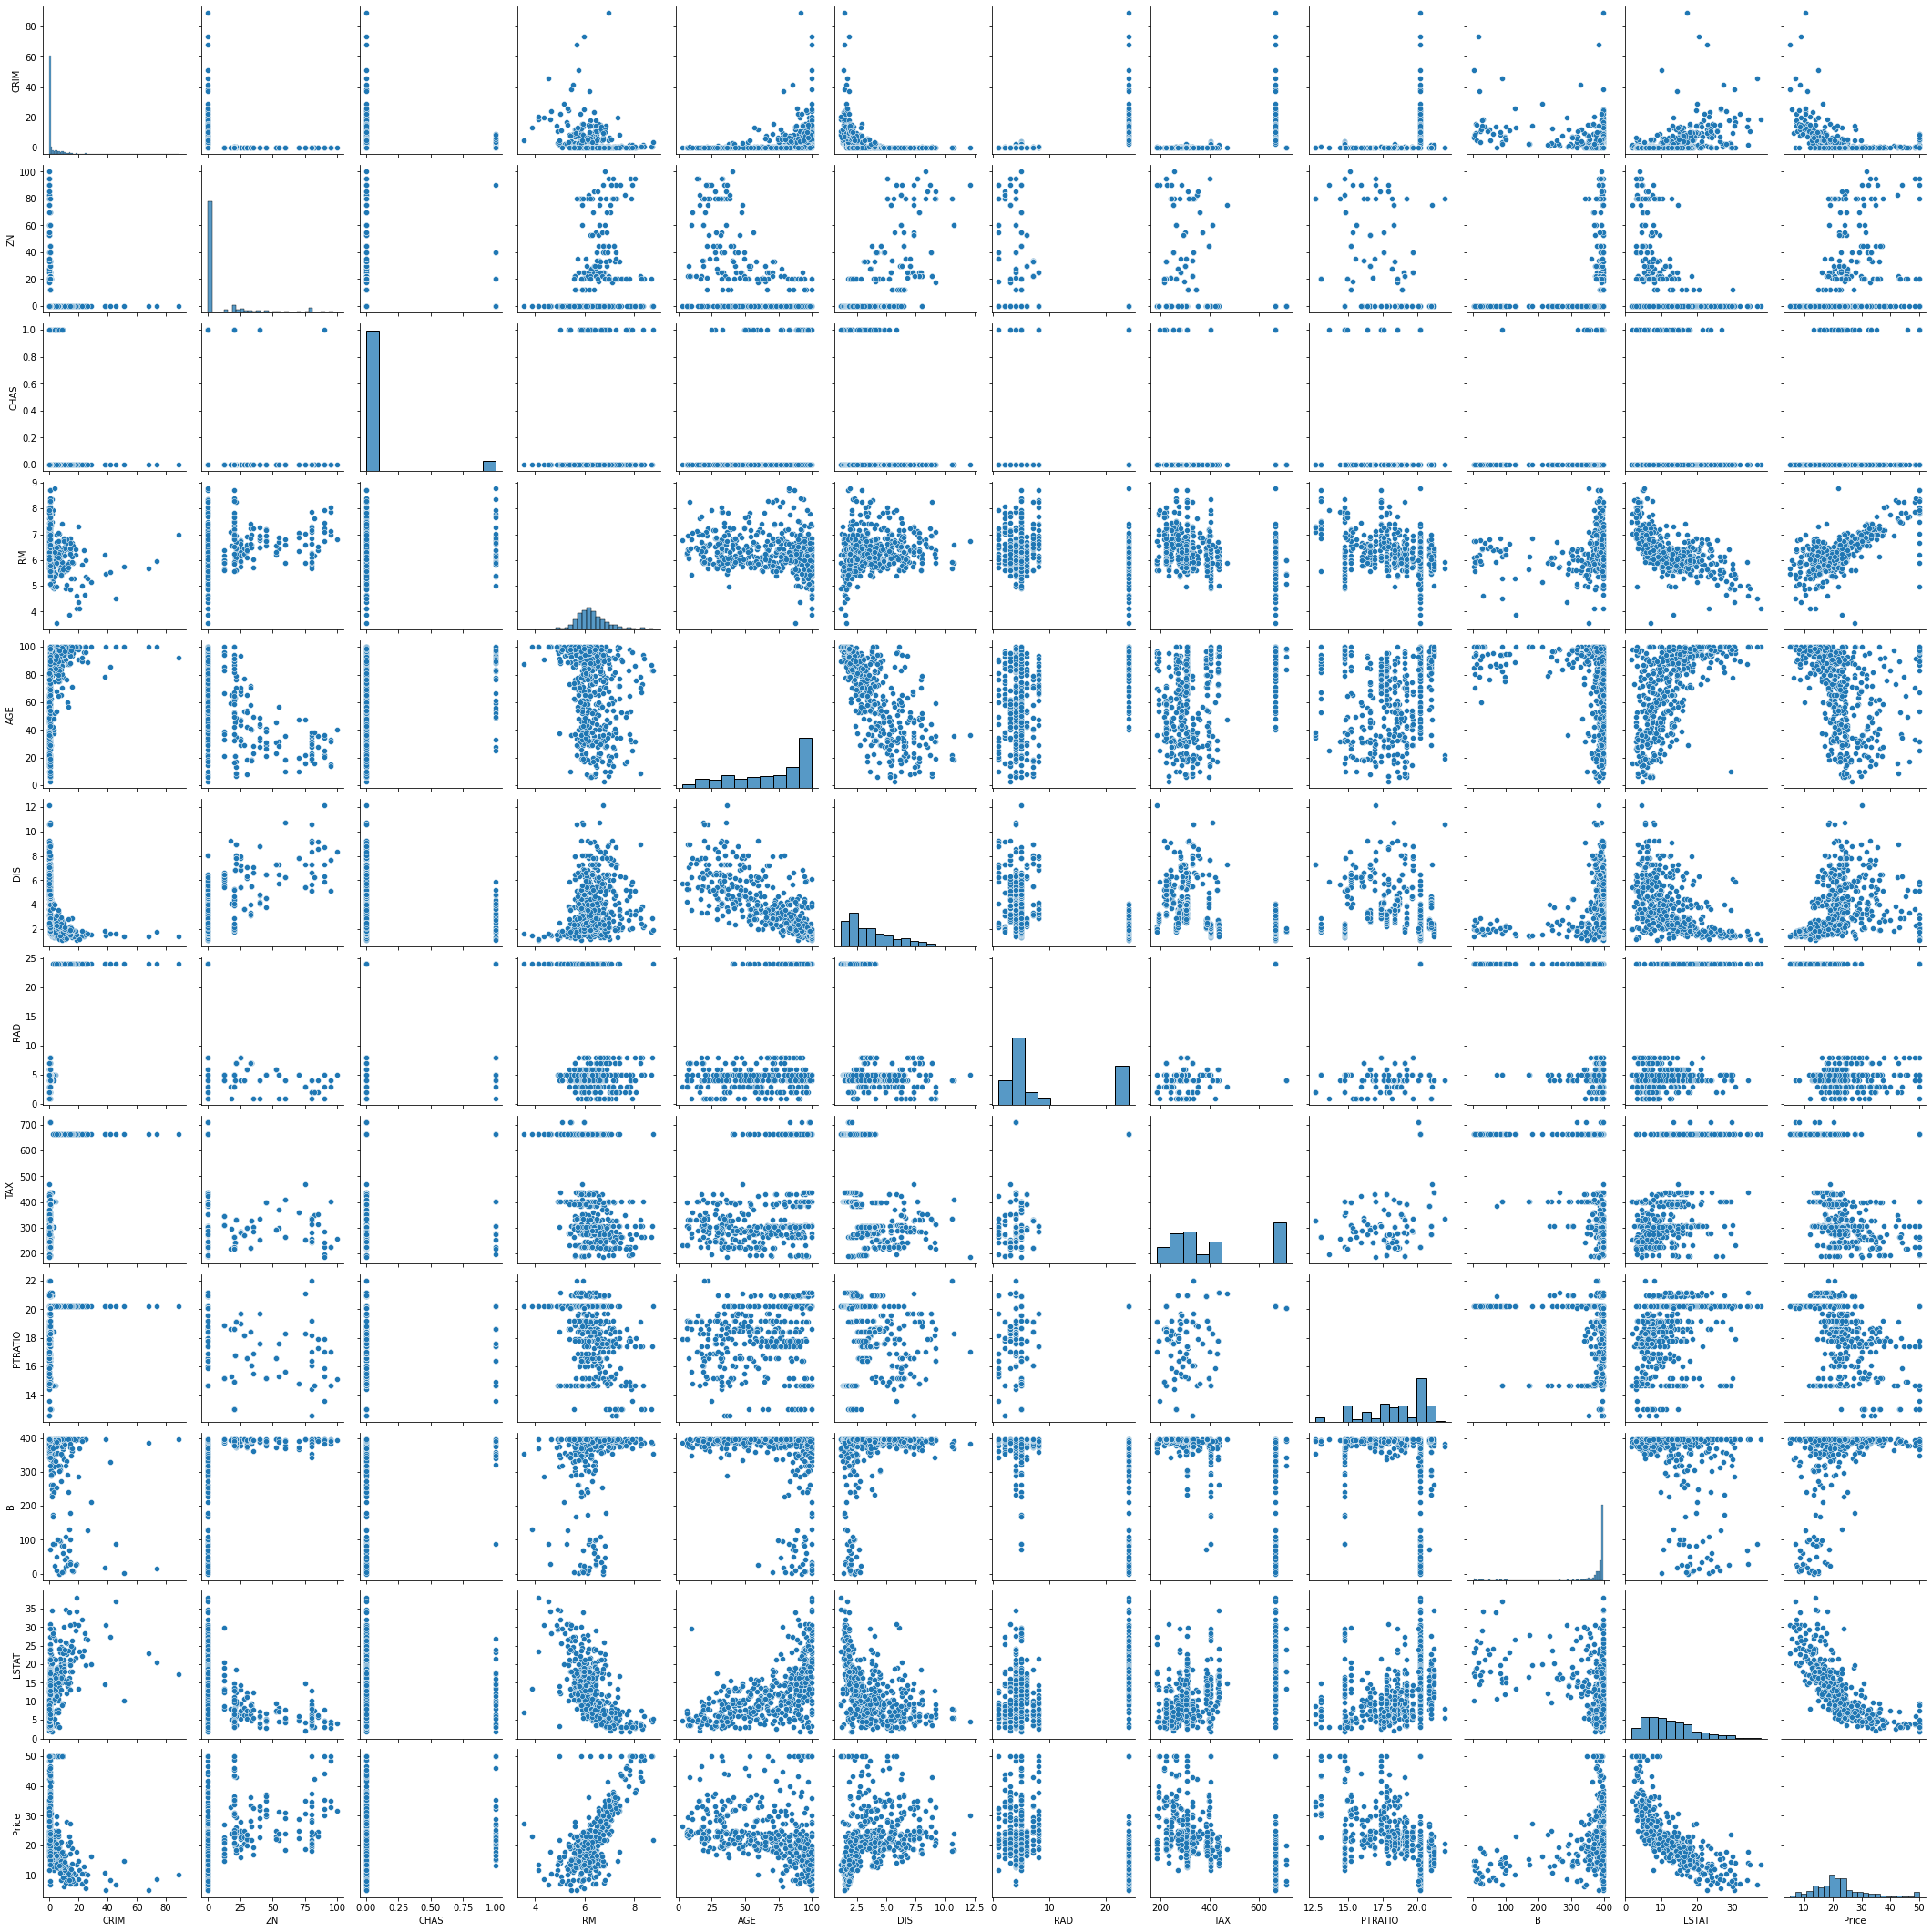

In [2]:
#There are cases of multicolinearity, we will drop a few columns
boston_df.drop(columns = ["INDUS", "NOX"], inplace = True)

#pairplot
sns.pairplot(boston_df)

In [3]:
#we will take the log of LSTAT Column
boston_df.LSTAT = np.log(boston_df.LSTAT)

Note that we logged the LSTAT column as it doesn’t have a linear relationship with the price column. Linear models assume a linear relationship between x and y variables. 

# Data Splitting and Scaling

In [4]:
#preview
features = boston_df.columns[0:11]
target = boston_df.columns[-1]

#X and y values
X = boston_df[features].values
y = boston_df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The dimension of X_train is (354, 11)
The dimension of X_test is (152, 11)


# Linear & Ridge Regression Models

In [5]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
#prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


The train score for lr model is 0.7859187129718976
The test score for lr model is 0.7672379770848983

Ridge Model............................................

The train score for ridge model is 0.7844233397895741
The test score for ridge model is 0.7696722158755338


Using an alpha value of 10, the evaluation of the model, the train, and test data indicate better performance on the ridge model than on the linear regression model.

We can also plot the coefficients for both the linear and ridge models.

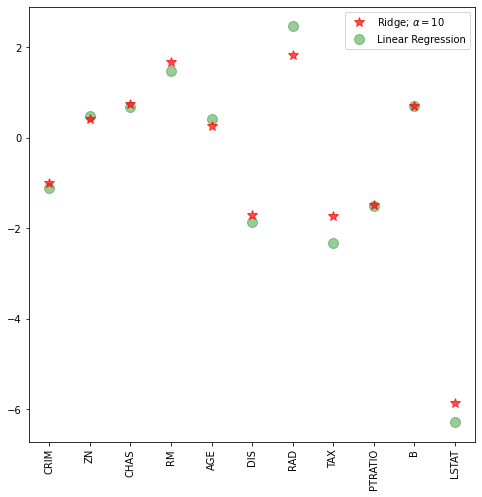

In [14]:
plt.figure(figsize = (8, 8))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=10,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=10,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Lasso Regression

In [15]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.0030704836212473996


We can visualize the coefficients too:

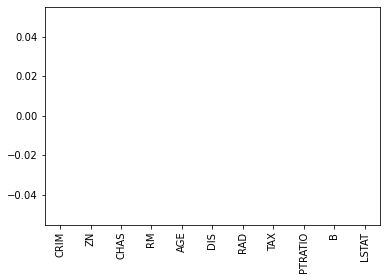

In [17]:
pd.Series(lasso.coef_, features).sort_values(ascending = True).plot(kind = "bar")
plt.show()

* Lasso model can inert coefficients to zero.
* In this case, using an alpha value of 10 over penalizes the model and shrinks all the values to zero. We can see this effectively by visualizing the coefficients of the model as shown in the figure above.

# Selecting Optimal Alpha Values Using Cross-Validation in Sklearn

Here we will try out different combinations of alpha values and then choose the best model.

In [19]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)

#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.7859187081843189
0.7672374265750733


We can now compare the coefficients from the lasso model with the rest of the models (linear and ridge).

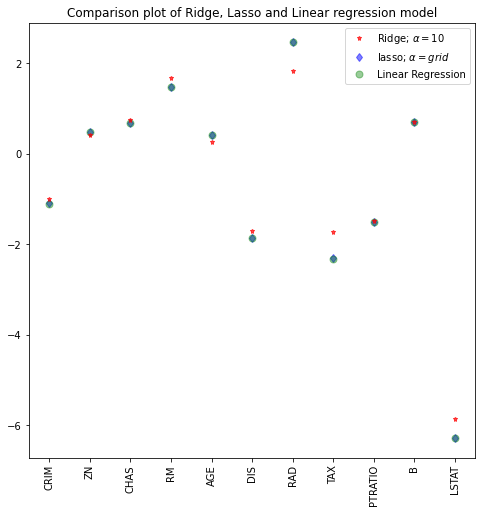

In [23]:
#plot size
plt.figure(figsize = (8,8))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()

A similar approach could be employed for the ridge regression model, which could lead to better results. In the sklearn package, the function RidgeCV performs similarly.

In [25]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.7858973065951269
The test score for ridge model is 0.7676510554851288


We have seen an implementation of ridge and lasso regression models and the theoretical and mathematical concepts behind these techniques. Some of the key takeaways from this tutorial include:

* The cost function for both ridge and lasso regression are similar. However, ridge regression takes the square of the coefficients and lasso takes the magnitude.
* Lasso regression can be used for automatic feature selection, as the geometry of its constrained region allows coefficient values to inert to zero.
* An alpha value of zero in either ridge or lasso model will have results similar to the regression model.
* The larger the alpha value, the more aggressive the penalization.